Balaji Kartheek (200968080)

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df  =pd.read_csv("/content/drive/MyDrive/Colab (Deep Learning)/Datasets/Google_Stock_Price/Google_Stock_Price_Train.csv")
test_df  =pd.read_csv("/content/drive/MyDrive/Colab (Deep Learning)/Datasets/Google_Stock_Price/Google_Stock_Price_Test.csv")

Train Dataset

In [ ]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


Test Dataset

In [ ]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


checking for null values in the Dataset

In [ ]:
print(train_df.isnull().sum())
print("--------------------------")
print(train_df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
--------------------------
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


Descriptive Analysis


In [ ]:
print(train_df.describe())
print("------------------------------------------")
print(test_df.describe())

              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     279.120000   281.210000   277.220000
25%     404.115000   406.765000   401.765000
50%     537.470000   540.750000   532.990000
75%     654.922500   662.587500   644.800000
max     816.680000   816.680000   805.140000
------------------------------------------
             Open        High         Low       Close
count   20.000000   20.000000   20.000000   20.000000
mean   807.526000  811.926500  801.949500  807.904500
std     15.125428   14.381198   13.278607   13.210088
min    778.810000  789.630000  775.800000  786.140000
25%    802.965000  806.735000  797.427500  802.282500
50%    806.995000  808.640000  801.530000  806.110000
75%    809.560000  817.097500  804.477500  810.760000
max    837.810000  841.950000  827.010000  835.670000


Train Data Attribute Distributions

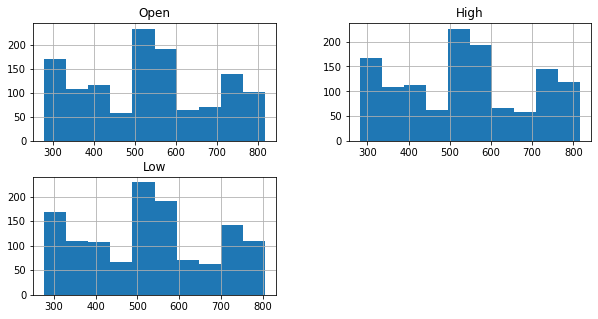

In [ ]:
train_df.hist(figsize = (10,5))
plt.show()

Test Data Attribute Distributions

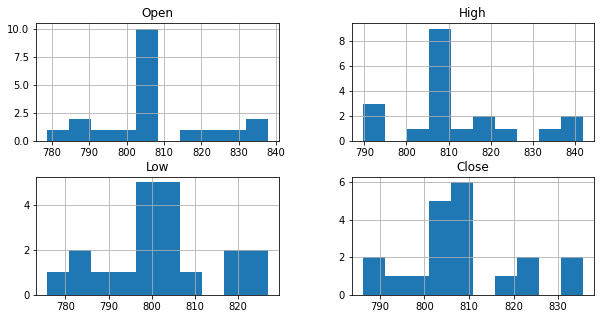

In [ ]:
test_df.hist(figsize = (10,5))
plt.show()

In [ ]:
train_df["Date"]

0         1/3/2012
1         1/4/2012
2         1/5/2012
3         1/6/2012
4         1/9/2012
           ...    
1253    12/23/2016
1254    12/27/2016
1255    12/28/2016
1256    12/29/2016
1257    12/30/2016
Name: Date, Length: 1258, dtype: object

### Open value variations

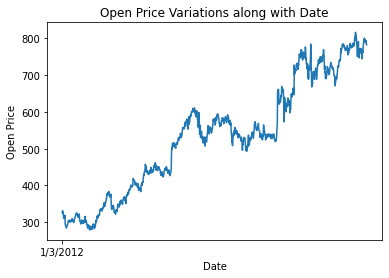

In [ ]:
x = train_df['Date']
y = train_df['Open']
plt.plot(x,y)
plt.xticks(train_df["Date"][0])
plt.title("Open Price Variations along with Date")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

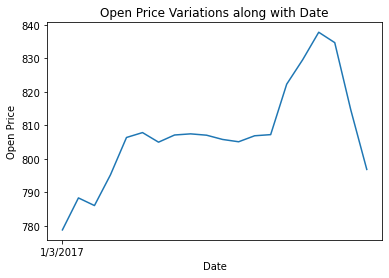

In [ ]:
x = test_df['Date']
y = test_df['Open']
plt.plot(x,y)
plt.xticks(test_df["Date"][0])
plt.title("Open Price Variations along with Date")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

### Volume variations 

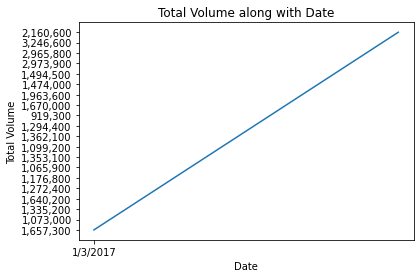

In [ ]:
 # for Test Data
x = test_df['Date']
y = test_df['Volume']
plt.plot(x,y)
plt.xticks(test_df["Date"][0])
plt.title("Total Volume along with Date")
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.show()

In [ ]:
#open google stock price - must be numpy array for RNN input
training_set = train_df.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set) 

- Creating a structure with 50 timesteps and 1 output
- Based on understanding past timesteps, model will try to predict following output.

In [ ]:
#stock prices during 50 timesteps ending at i
X_train = [training_set_scaled[i-50:i, 0] for i in range(50, len(training_set_scaled))]

#stock price at the time i+1
y_train = [training_set_scaled[i, 0] for i in range(50, len(training_set_scaled))]

In [ ]:
X_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
        0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
        0.02273235, 0.02810849, 0.03212665, 0.

In [ ]:
#changing data type to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
        0.05065481],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
        0.05214302],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
        0.05612397],
       ...,
       [0.9313937 , 0.94636878, 0.96569685, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.94636878, 0.96569685, 0.97510976, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.96569685, 0.97510976, 0.95966962, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
#(number of observations, number of timesteps, numbers of indicators)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout



# Recurrent Neural Network(RNN)
### What is The Recurrent Neural Network(RNN)?
A recurrent neural network (RNN) is a special type of an artificial neural network adapted to work for time series data or data that involves sequences. Ordinary feed forward neural networks are only meant for data points, which are independent of each other. However, if we have data in a sequence such that one data point depends upon the previous data point, we need to modify the neural network to incorporate the dependencies between these data points. RNNs have the concept of ‘memory’ that helps them store the states or information of previous inputs to generate the next output of the sequence.

#### Creating a RNN

In [ ]:
input_shape = (X_train.shape[1], 1)
input_shape

(50, 1)

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Add the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = "adam", loss = "mean_squared_error")

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 50ms/step - loss: 0.4107
Epoch 2/100
38/38 [==============================] - 2s 48ms/step - loss: 0.2300
Epoch 3/100
38/38 [==============================] - 2s 49ms/step - loss: 0.2213
Epoch 4/100
38/38 [==============================] - 2s 48ms/step - loss: 0.1509
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.1149
Epoch 6/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0930
Epoch 7/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0713
Epoch 8/100
29/38 [=====================>........] - ETA: 0s - loss: 0.0687

KeyboardInterrupt: ignored

In [ ]:
test_df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
test_set = test_df.iloc[:,1:2].values

In [ ]:
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Predicting the stock prices by RNN model

In [ ]:

dataset_total = pd.concat((train_df["Open"], test_df["Open"]), axis = 0)


inputs = dataset_total[len(dataset_total) - len(test_df) - 50:].values
inputs = inputs.reshape(-1,1)


inputs = sc.transform(inputs)

#new structure of inputs
X_test = [inputs[i - 50:i,0] for i in range(50, 70)]
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
#inversing the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
plt.plot(test_set, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction by RNN")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# Long Short Term Memory(LSTM) <a id = "5"></a>


### What is The Long Shrt Term Memory(LSTM)?
Long Short Term Memory is a kind of recurrent neural network. In RNN output from the last step is fed as input in the current step. LSTM was designed by Hochreiter & Schmidhuber. It tackled the problem of long-term dependencies of RNN in which the RNN cannot predict the word stored in the long-term memory but can give more accurate predictions from the recent information. As the gap length increases RNN does not give an efficient performance. LSTM can by default retain the information for a long period of time. It is used for processing, predicting, and classifying on the basis of time-series data.


In [ ]:
# Initialising the RNN
lstm = Sequential()

# Add the first LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm.add(Dropout(0.2))

# Second LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50, activation = "tanh", return_sequences = True))
lstm.add(Dropout(0.2))

# Third LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50, activation = "tanh", return_sequences = True))
lstm.add(Dropout(0.2))

# Fourth LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.2))

# Add the output layer
lstm.add(Dense(units = 1))

# Compiling the LSTM
lstm.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the LSTM to the training set
lstm.fit(X_train, y_train, epochs = 100, batch_size = 32)

### Predicting the stock prices by LSTM model

In [ ]:
predicted_stock_price = lstm.predict(X_test)
#inversing the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
plt.plot(test_set, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction by LSTM")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# CONCLUSION 


- From above two model predictions of the Google stocks. LSTM model is performing very well than the RNN model.
- LSTM is more accurate than RNN when comparing to the RNN as LSTM has lesser mean squared error than the RNN.
- In the Time Range of 12.5 to 17.5 The actual Google stock price is increasing upto time 16 and decreasin from 16 to 17.5, In this Range LSTM performs very well follows the same pattern as of real stock price flow than the RNN model.